## Adding SNe to CoCo
___

This notebook will go through adding a SN to the CoCo template framework.

In [1]:
%matplotlib inline
# %matplotlib notebook

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import numpy as np
from astropy.table import Table, Column
from collections import OrderedDict

import pycoco as pcc

## Download SN
---
The example that I will go through is probably the simplest one - from a JSON that I have downloaded from http://sne.space contaning the information for SN2015U.

In [2]:
import json

In [3]:
snname = "SN2015U"
path = "/Users/berto/data/CoreCollapse/SNe/SN2015U.json"

sndict = json.load(open(path, 'r'))[snname]

In [4]:
sndict.keys()

dict_keys(['schema', 'name', 'sources', 'alias', 'claimedtype', 'comovingdist', 'dec', 'discoverdate', 'discoverer', 'ebv', 'host', 'hostdec', 'hostoffsetang', 'hostoffsetdist', 'hostra', 'hostvelocity', 'lumdist', 'maxabsmag', 'maxappmag', 'maxband', 'maxdate', 'maxvisualabsmag', 'maxvisualappmag', 'maxvisualband', 'maxvisualdate', 'ra', 'redshift', 'velocity', 'photometry', 'spectra'])

In [5]:
sndict["redshift"][0]["value"]

'0.01379'

In [6]:
len(sndict["spectra"])

21

In [7]:
S1 = sndict["spectra"][0]

In [8]:
S1.keys()

dict_keys(['time', 'filename', 'instrument', 'observer', 'reducer', 'snr', 'u_errors', 'u_fluxes', 'u_time', 'u_wavelengths', 'data', 'source'])

In [9]:
w = np.array(S1["data"], dtype=np.float64).T[0]
f = np.array(S1["data"], dtype=np.float64).T[1]

In [10]:
f

array([ 0.17578192,  0.24098685,  0.15754801, ...,  0.15758722,
        0.14430489,  0.1320765 ])

In [11]:
from astropy.table import Table, Column, Row
import astropy.units as u


In [12]:
wavelength = Column(w, name = ("wavelength"), unit=u.Angstrom)
flux = Column(f, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)

In [13]:
Table([wavelength, flux])

wavelength,flux
Angstrom,erg / (Angstrom cm2 s)
float64,float64
3440.0,0.17578192
3442.0,0.24098685
3444.0,0.15754801
3446.0,0.1271165
3448.0,0.16798687
3450.0,0.15301467
3452.0,0.11438128
3454.0,0.14230451


In [14]:
spec_dict_list = sndict["spectra"]
for s in spec_dict_list:
    print(s["time"], s["filename"])

57068.3 psn0728+3349-20150215.256-ui.flm
57068.3 psn0728+3349.gal-20150215.256-ui.flm
57070.0 PSNJ07285387p3349106_20150217_Ekar182_AFOSC_cal.ascii
57070.0 SN2015U_2015-02-17_20:01:56_Asiago.ascii
57071.0 PSNJ07285387p3349106_20150218_Ekar182_AFOSC_cal.ascii
57071.2 psn0728+3349-20150218.211-ir.flm
57071.2 psn0728+3349.gal-20150218.211-ir.flm
57072.0 PSNJ07285387p3349106_20150219_Ekar182_AFOSC_cal.ascii
57074.2 psn0728+3349-20150221.207-ui.flm
57074.2 psn0728+3349.gal-20150221.207-ui.flm
57074.2 psn0728+3349.sn+gal-20150221.207-ui.flm
57075.0 PSNJ07285387p3349106_20150222_NOT_ALFOSC_cal.ascii
57076.0 PSNJ07285387p3349106_20150223_TNG_LRS_cal.ascii
57077.2 psn0728+3349-20150224.224-ui.flm
57077.4 psn0728+3349-20150224.414-uh.flm
57078.0 PSNJ07285387p3349106_20150225_TNG_LRS_cal.ascii
57078.2 psn0728+3349-20150225.171-ui.flm
57080.3 psn0728+3349-20150227.34.deimos.flm
57081.0 PSNJ07285387p3349106_20150228_TNG_LRS_cal.ascii
57084.0 PSNJ07285387p3349106_20150303_NOT_ALFOSC_cal.ascii
57092.

In [15]:
print(len(spec_dict_list))

21


In [16]:
# to_combine = ["SN10as_100325_VLT_XS_", 
#               "SN10as_100326_VLT_XS_", 
#               "SN10as_100328_VLT_XS_", 
#               "SN10as_100329_VLT_XS_"]

# to_combine_phases = [55280.0,
#                      55281.0,
#                      55283.0,
#                      55284.0]

# spec_filenames = [spec["filename"] for spec in sndict["spectra"]]
# # spec_filenames = [spec["filename"][:-7] for spec in sndict["spectra"]]
# mask = np.ones(len(spec_dict_list), dtype=bool)

# combined = np.array([])

# for prefix in to_combine:
#     matches = [f for f in spec_filenames if prefix in f]
#     print(matches)
    
#     spec_dir = "/Users/berto/data/CoreCollapse/data/spectra/SN2010as/"
    
#     tables = []
#     out_dict = OrderedDict()
#     for file in matches:
#         w = np.where(np.array(spec_filenames) == file)[0]
        
#         wavl = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[0]
#         flux = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[1]
        
#         wavelength = Column(wavl, name = ("wavelength"), unit=u.Angstrom)
#         flux = Column(flux, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)
     
#         tables.append(Table([wavelength, flux]))
        
#         for i in w:
#             print(i, spec_dict_list[i]["filename"])
#             mask[i] = False
# #             spec_dict_list.pop(i)
            
#     tables = np.array(tables)[np.argsort([i["wavelength"][0] for i in tables])]
    
#     S1 = pcc.SpectrumClass()
#     S2 = pcc.SpectrumClass()
#     S3 = pcc.SpectrumClass()
    
#     S1.load_table(tables[0], path="")
#     S2.load_table(tables[1], path="")
#     S3.load_table(tables[2], path="")
    
#     sr=pcc.functions.combine_spectra(S2, S3, 9975, 10150, scale=True)
#     spec = pcc.functions.combine_spectra(S1,sr, 5502.5, 5525)
    
#     out_spec = pcc.SpectrumClass()
#     out_spec.load_table(spec.data, path="", trim_wavelength=True, wmin=0, wmax=15000)
    
#     filename = prefix+"combined.dat"
    
#     out_dict["filename"] = os.path.join(spec_dir, filename)
#     out_dict["time"] = np.float64(spec_dict_list[w]["time"])
#     out_dict["redshift"] = spec_dict_list[w]["redshift"]
#     out_dict["snname"] = snname
    
#     combined = np.append(combined, out_dict)
    
# #     spec.plot()
# #     spec.save(filename, path=spec_dir, format="ascii.commented_header", verbose=True)
#     out_spec.plot()
#     out_spec.save(filename, path=spec_dir, format="ascii.commented_header", verbose=True)

In [17]:
out_dict = OrderedDict()

In [18]:
uncombined=np.array([])
spec_filenames = [spec["filename"] for spec in sndict["spectra"]]
# print(spec_filenames)
spec_dir = "/Users/berto/data/CoreCollapse/data/spectra/SN2015U/"

psn0728+3349-20150215.256-ui.flm
0
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150215.256-ui.flm
has data
redshift  0.01379
57068.3


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150215.256-ui.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


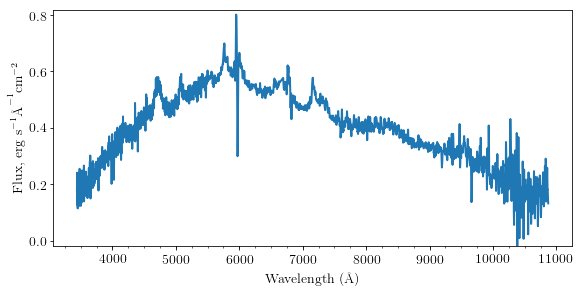

psn0728+3349.gal-20150215.256-ui.flm
1
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150215.256-ui.flm
has data
redshift  0.01379
57068.3


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150215.256-ui.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


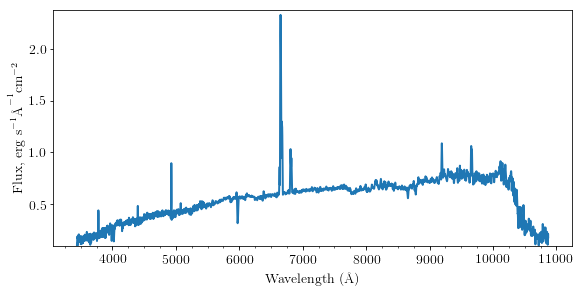

PSNJ07285387p3349106_20150217_Ekar182_AFOSC_cal.ascii
2
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150217_Ekar182_AFOSC_cal.ascii
has data
redshift  0.01379
57070.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150217_Ekar182_AFOSC_cal.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


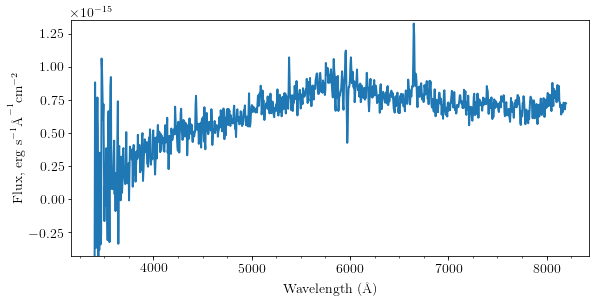

SN2015U_2015-02-17_20:01:56_Asiago.ascii
3
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/SN2015U_2015-02-17_20:01:56_Asiago.ascii
has data
redshift 

/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/SN2015U_2015-02-17_20:01:56_Asiago.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


 0.01379
57070.0


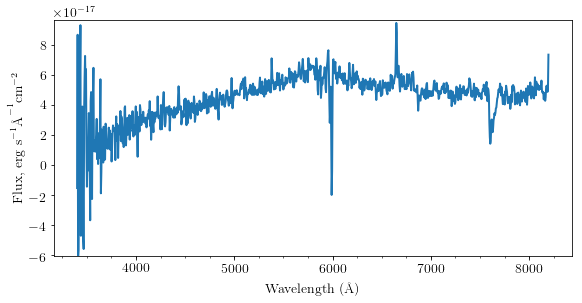

PSNJ07285387p3349106_20150218_Ekar182_AFOSC_cal.ascii
4
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150218_Ekar182_AFOSC_cal.ascii
has data
redshift  0.01379
57071.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150218_Ekar182_AFOSC_cal.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


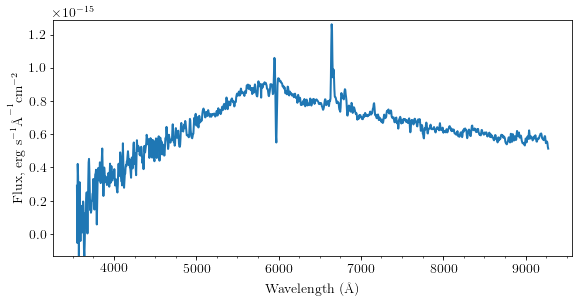

psn0728+3349-20150218.211-ir.flm
5
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150218.211-ir.flm
has data
redshift  0.01379
57071.2


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150218.211-ir.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


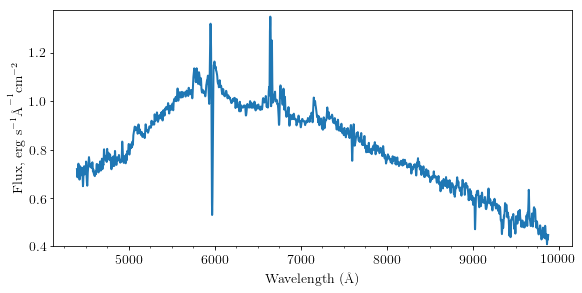

psn0728+3349.gal-20150218.211-ir.flm
6
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150218.211-ir.flm
has data
redshift  0.01379
57071.2


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150218.211-ir.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


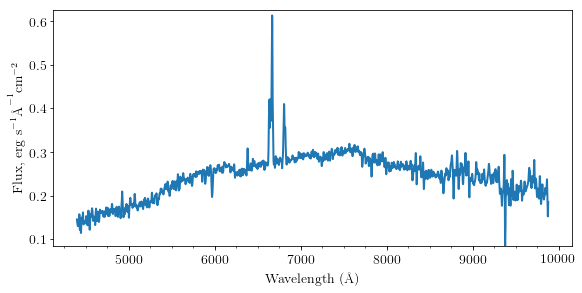

PSNJ07285387p3349106_20150219_Ekar182_AFOSC_cal.ascii
7
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150219_Ekar182_AFOSC_cal.ascii
has data
redshift  0.01379
57072.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150219_Ekar182_AFOSC_cal.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


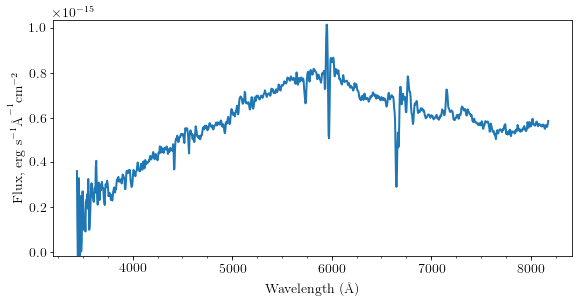

psn0728+3349-20150221.207-ui.flm
8
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150221.207-ui.flm
has data
redshift  0.01379
57074.2


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150221.207-ui.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


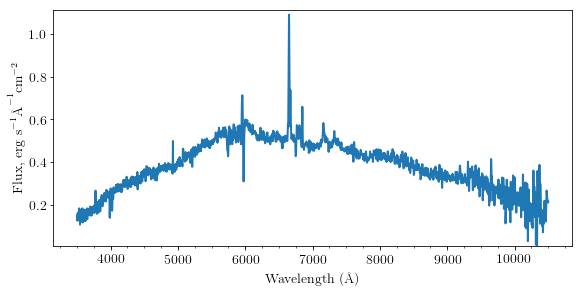

psn0728+3349.gal-20150221.207-ui.flm
9
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150221.207-ui.flm
has data
redshift  0.01379
57074.2


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150221.207-ui.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


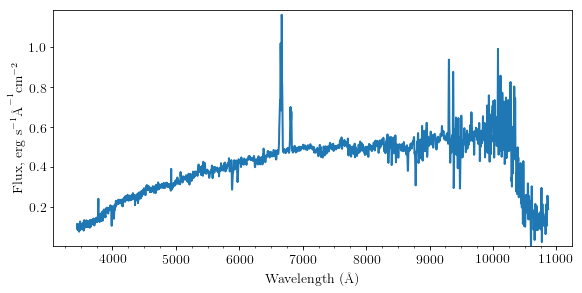

psn0728+3349.sn+gal-20150221.207-ui.flm
10
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.sn+gal-20150221.207-ui.flm
has data
redshift  0.01379
57074.2


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.sn+gal-20150221.207-ui.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


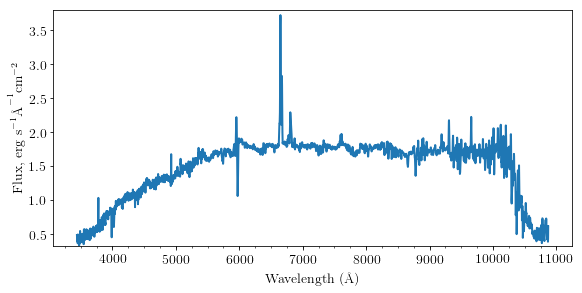

PSNJ07285387p3349106_20150222_NOT_ALFOSC_cal.ascii
11
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150222_NOT_ALFOSC_cal.ascii
has data
redshift  0.01379
57075.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150222_NOT_ALFOSC_cal.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


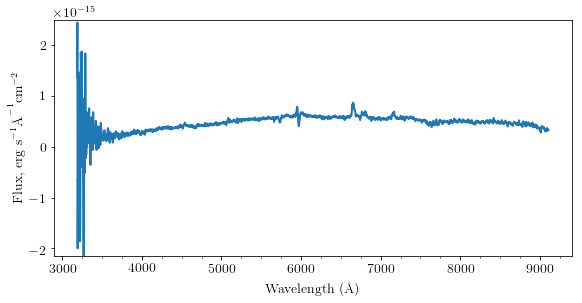

PSNJ07285387p3349106_20150223_TNG_LRS_cal.ascii
12
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150223_TNG_LRS_cal.ascii
has data
redshift  0.01379
57076.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150223_TNG_LRS_cal.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


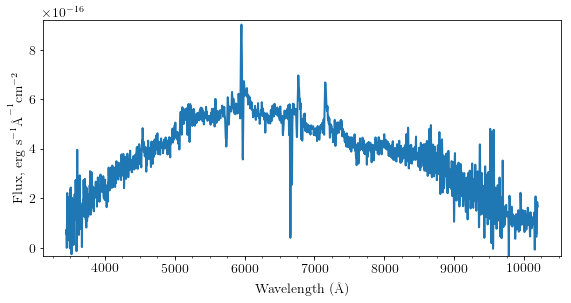

psn0728+3349-20150224.224-ui.flm
13
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150224.224-ui.flm
has data
redshift  0.01379
57077.2


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150224.224-ui.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


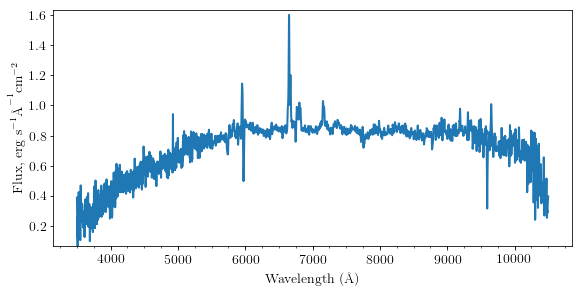

psn0728+3349-20150224.414-uh.flm
14
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150224.414-uh.flm
has data
redshift  0.01379
57077.4


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150224.414-uh.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


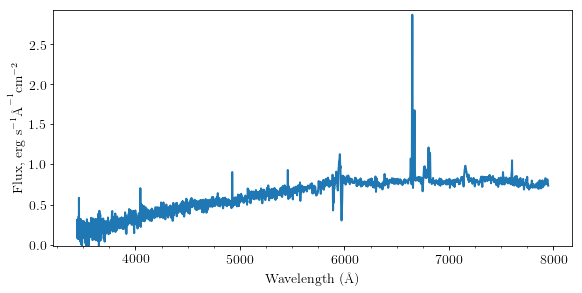

PSNJ07285387p3349106_20150225_TNG_LRS_cal.ascii
15
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150225_TNG_LRS_cal.ascii
has data
redshift  0.01379
57078.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150225_TNG_LRS_cal.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


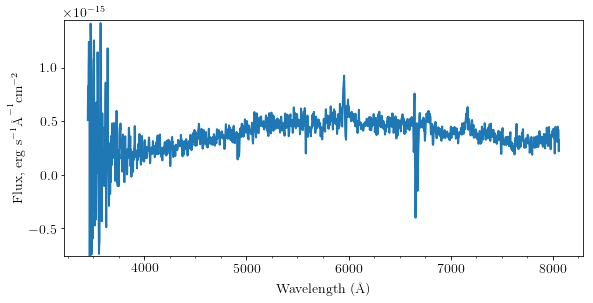

psn0728+3349-20150225.171-ui.flm
16
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150225.171-ui.flm
has data
redshift  0.01379
57078.2


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150225.171-ui.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


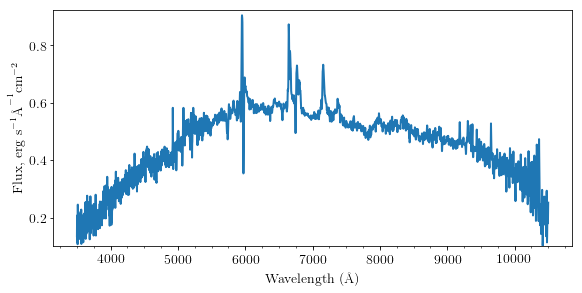

psn0728+3349-20150227.34.deimos.flm
17
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150227.34.deimos.flm
has data
redshift  0.01379
57080.3


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150227.34.deimos.flm. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


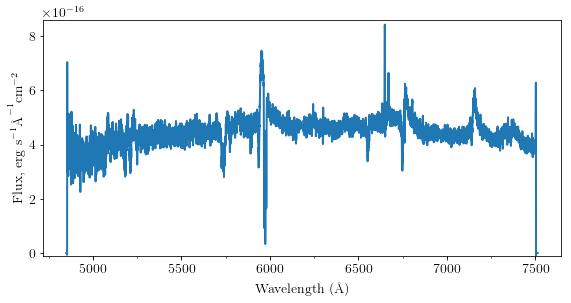

PSNJ07285387p3349106_20150228_TNG_LRS_cal.ascii
18
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150228_TNG_LRS_cal.ascii
has data
redshift  0.01379
57081.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150228_TNG_LRS_cal.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


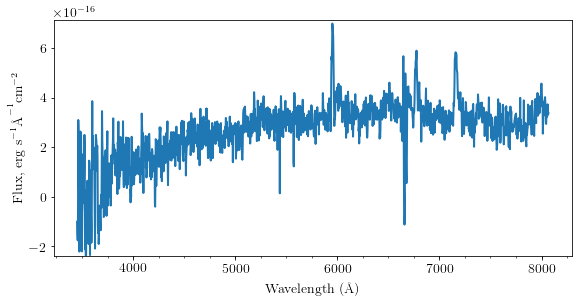

PSNJ07285387p3349106_20150303_NOT_ALFOSC_cal.ascii
19
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150303_NOT_ALFOSC_cal.ascii
has data
redshift  0.01379
57084.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150303_NOT_ALFOSC_cal.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


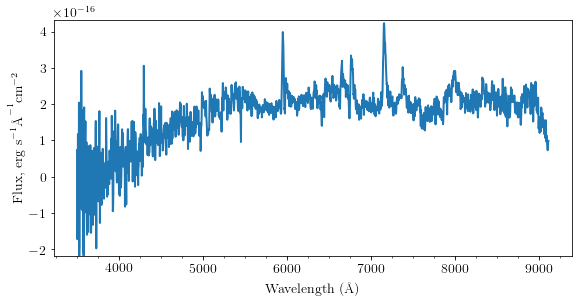

PSNJ07285387p3349106_20150311_NOT_ALFOSC_cal.ascii
20
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150311_NOT_ALFOSC_cal.ascii
has data
redshift  0.01379
57092.0


/Users/berto/Code/verbose-enigma/pycoco/classes.py:490: UserWarning: Found existing file matching /Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150311_NOT_ALFOSC_cal.ascii. Run with squash = True to overwrite
  filename) + ". Run with squash = True to overwrite")


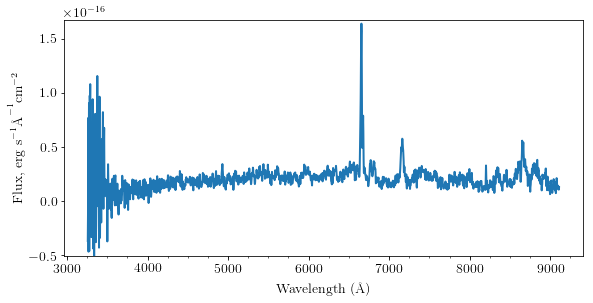

In [19]:
for spec_file in np.array(spec_filenames):
# for spec_file in np.array(spec_filenames)[mask]:
    print(spec_file)
    
    w = np.where(np.array(spec_filenames) == spec_file)[0][0]
    print(w)
    
    wavl = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[0]
    flux = np.array(spec_dict_list[w]["data"], dtype=np.float64).T[1]

    wavelength = Column(wavl, name = ("wavelength"), unit=u.Angstrom)
    flux = Column(flux, name = ("flux"), unit=u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom)

    spec_table = Table([wavelength, flux])

    s = pcc.SpectrumClass()

    s.load_table(spec_table, path="")
    print(os.path.join(spec_dir, spec_file))
    s.save(spec_file, path=spec_dir, )
    out_dict = OrderedDict()
    out_dict["filename"] = os.path.join(spec_dir, spec_file)
    out_dict["time"] = np.float64(spec_dict_list[w]["time"])
    out_dict["redshift"] = np.float64(sndict["redshift"][0]["value"])
    print("redshift ", out_dict["redshift"])
    out_dict["snname"] = snname
    print(spec_dict_list[w]["time"])
    uncombined = np.append(uncombined, out_dict)
    
    s.plot()

In [20]:
# out_array = np.append(combined, uncombined)

In [21]:
out_array = uncombined

In [22]:
out_array

array([ OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150215.256-ui.flm'), ('time', 57068.300000000003), ('redshift', 0.01379), ('snname', 'SN2015U')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150215.256-ui.flm'), ('time', 57068.300000000003), ('redshift', 0.01379), ('snname', 'SN2015U')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150217_Ekar182_AFOSC_cal.ascii'), ('time', 57070.0), ('redshift', 0.01379), ('snname', 'SN2015U')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2015U/SN2015U_2015-02-17_20:01:56_Asiago.ascii'), ('time', 57070.0), ('redshift', 0.01379), ('snname', 'SN2015U')]),
       OrderedDict([('filename', '/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150218_Ekar182_AFOSC_cal.ascii'), ('time', 57071.0), ('redshift', 0.01379), ('s

In [23]:
# [i["filename"] for i in out_array]
# [i["redshift"] for i in out_array]
# [i["snname"] for i in out_array]
# [i["time"] for i in out_array]

We need a (rough) estimate of the time of maximum light (only to ensure the spectra adhere to our naming convention), so from Folatelli et al. 2014 (http://iopscience.iop.org/article/10.1088/0004-637X/792/1/7/pdf) we have:

In [24]:
# mjdmax = 55286.4

In [25]:
# keys = out_array[0].keys()

keys = ["filename",
        "snname",
        "time",
        "redshift"]
columns = []
for key in keys:
    columns.append([i[key] for i in out_array])

In [26]:
keys[2] = "MJD"
list_table = Table(columns, names = keys)

In [27]:
list_table.add_index("MJD")
list_table.sort()

In [28]:
list_table

filename,snname,MJD,redshift
str105,str7,float64,float64
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150215.256-ui.flm,SN2015U,57068.3,0.01379
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150215.256-ui.flm,SN2015U,57068.3,0.01379
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150217_Ekar182_AFOSC_cal.ascii,SN2015U,57070.0,0.01379
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/SN2015U_2015-02-17_20:01:56_Asiago.ascii,SN2015U,57070.0,0.01379
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150218_Ekar182_AFOSC_cal.ascii,SN2015U,57071.0,0.01379
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349-20150218.211-ir.flm,SN2015U,57071.2,0.01379
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150218.211-ir.flm,SN2015U,57071.2,0.01379
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/PSNJ07285387p3349106_20150219_Ekar182_AFOSC_cal.ascii,SN2015U,57072.0,0.01379
/Users/berto/data/CoreCollapse/data/spectra/SN2015U/psn0728+3349.gal-20150221.207-ui.flm,SN2015U,57074.2,0.01379


In [29]:
list_out_path = os.path.join(pcc._default_list_dir_path, snname+".list")
list_table.write(list_out_path, format="ascii.no_header")

In [30]:
info = pcc.InfoClass()
info.load()

In [31]:
info._data

snname,z_obs,mu,RA,Dec,Type,z_distmod,SkyCoords
,,,,,,,"deg,deg"
str9,float64,float64,str13,str13,str3,float64,object
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,0.000846738572565,"148.85322791666664,69.02047277777778"
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,0.00183405936245,"202.47529999999995,47.191805555555554"
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,0.00316927429656,"165.92491666666666,28.903805555555554"
SN1998bw,0.0085,32.69,19:35:03.17,-52:50:46.1,Ic,0.00793139066351,"293.76320833333324,-52.846138888888895"
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,0.00707356943452,"354.06125,2.1524444444444444"
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,0.00206697015014,"24.099375,15.753666666666666"
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,0.01676453466,"350.2640833333333,-4.8959722222222215"
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,0.0179472672379,"179.45933333333332,25.265305555555557"


In [32]:
small_table = info._data[("snname", "z_obs", "mu", "RA", "Dec", "Type", "z_distmod")]

In [33]:
small_table

snname,z_obs,mu,RA,Dec,Type,z_distmod
str9,float64,float64,str13,str13,str3,float64
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,0.000846738572565
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,0.00183405936245
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,0.00316927429656
SN1998bw,0.0085,32.69,19:35:03.17,-52:50:46.1,Ic,0.00793139066351
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,0.00707356943452
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,0.00206697015014
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,0.01676453466
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,0.0179472672379
SN2005bf,0.0189,34.73,10:23:56.99,-03:11:29.3,Ib,0.0201040285508


In [34]:
sndict.keys()

dict_keys(['schema', 'name', 'sources', 'alias', 'claimedtype', 'comovingdist', 'dec', 'discoverdate', 'discoverer', 'ebv', 'host', 'hostdec', 'hostoffsetang', 'hostoffsetdist', 'hostra', 'hostvelocity', 'lumdist', 'maxabsmag', 'maxappmag', 'maxband', 'maxdate', 'maxvisualabsmag', 'maxvisualappmag', 'maxvisualband', 'maxvisualdate', 'ra', 'redshift', 'velocity', 'photometry', 'spectra'])

In [35]:
sndict["lumdist"]

[{'derived': True,
  'source': '2,4,9,10,12,14,16',
  'u_value': 'Mpc',
  'value': '61.673'}]

In [36]:
from astropy.cosmology import LambdaCDM
from astropy.coordinates import Distance

mu = 32.16 ## from NED -- https://ned.ipac.caltech.edu/ui/?q=objsearch&omegav=0.73&obj_sort=RA%20or%20Longitude&omegam=0.27&extend=no&hconst=73&out_csys=Equatorial&of=pre_text&img_stamp=YES&list_limit=5&out_equinox=J2000.0&corr_z=1&objname=NGC%206000

d = Distance(distmod=mu)

z_distmod = d.z

In [37]:
(snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod)

('SN2015U',
 '0.01379',
 32.16,
 '07:28:53.87',
 '+33:49:10.6',
 'Ibn',
 0.0062219449351045312)

In [38]:
small_table.add_row((snname, sndict["redshift"][0]["value"], mu, sndict["ra"][0]["value"], sndict["dec"][0]["value"], sndict["claimedtype"][0]["value"].replace("/", ""), z_distmod))

In [39]:
small_table

snname,z_obs,mu,RA,Dec,Type,z_distmod
str9,float64,float64,str13,str13,str3,float64
SN1993J,-0.0001,27.82,09:55:24.7747,+69:01:13.702,IIb,0.000846738572565
SN1994I,0.0015,29.5,13:29:54.072,+47:11:30.50,Ic,0.00183405936245
SN1996cb,0.0024,30.69,11:03:41.98,+28:54:13.7,IIb,0.00316927429656
SN1998bw,0.0085,32.69,19:35:03.17,-52:50:46.1,Ic,0.00793139066351
SN1999dn,0.0093,32.44,23:36:14.70,+02:09:08.8,Ib,0.00707356943452
SN2002ap,0.0022,29.76,01:36:23.85,+15:45:13.2,Ic,0.00206697015014
SN2003jd,0.0188,34.33,23:21:03.38,-04:53:45.5,Ic,0.01676453466
SN2004aw,0.0159,34.48,11:57:50.24,+25:15:55.1,Ic,0.0179472672379
SN2005bf,0.0189,34.73,10:23:56.99,-03:11:29.3,Ib,0.0201040285508


In [40]:
outfile = pcc._default_info_path.replace(".dat", "_new.dat")
small_table.write(outfile, format="ascii.commented_header")


# Photometry
---


In [41]:
sndict["photometry"]

[{'band': 'clear',
  'e_magnitude': '0.1515',
  'magnitude': '18.0616',
  'source': '1,13',
  'telescope': 'KAIT',
  'time': '57064.24',
  'u_time': 'MJD'},
 {'band': 'clear',
  'e_magnitude': '0.0646',
  'magnitude': '16.8465',
  'source': '1,13',
  'telescope': 'KAIT',
  'time': '57066.22',
  'u_time': 'MJD'},
 {'band': 'B',
  'e_magnitude': '0.1749',
  'magnitude': '17.7117',
  'source': '1,13',
  'telescope': 'KAIT',
  'time': '57067.35',
  'u_time': 'MJD'},
 {'band': 'R',
  'e_magnitude': '0.0592',
  'magnitude': '16.4640',
  'source': '1,13',
  'telescope': 'KAIT',
  'time': '57067.35',
  'u_time': 'MJD'},
 {'band': 'V',
  'e_magnitude': '0.0891',
  'magnitude': '16.9832',
  'source': '1,13',
  'telescope': 'KAIT',
  'time': '57067.35',
  'u_time': 'MJD'},
 {'band': 'clear',
  'e_magnitude': '0.0542',
  'magnitude': '16.5726',
  'source': '1,13',
  'telescope': 'KAIT',
  'time': '57067.35',
  'u_time': 'MJD'},
 {'band': 'I',
  'e_magnitude': '0.0766',
  'magnitude': '16.1834',
  

In [42]:
phot_dict_list = sndict["photometry"]
new_phot_dict_list = []
for i in phot_dict_list:
    out_dict = OrderedDict()
    
    out_dict["MJD"] = np.float64(i["time"])
    out_dict["mag"] = np.float64(i["magnitude"])
    out_dict["dmag"] = np.float64(i["e_magnitude"])
    out_dict["filter"] = i["band"]
    
    new_phot_dict_list.append(out_dict)

In [43]:
phot_table=Table(rows=new_phot_dict_list)

In [44]:
phot_table

MJD,dmag,filter,mag
float64,float64,str5,float64
57064.24,0.1515,clear,18.0616
57066.22,0.0646,clear,16.8465
57067.35,0.1749,B,17.7117
57067.35,0.0592,R,16.464
57067.35,0.0891,V,16.9832
57067.35,0.0542,clear,16.5726
57067.36,0.0766,I,16.1834
57068.21,0.1072,B,17.6548
57068.22,0.0561,I,16.2318


In [45]:
w = np.where(phot_table["filter"] != "clear")
# print(w)

In [46]:
phot_table_filtered = phot_table[w]

In [47]:
# pcc.calc_AB_zp?
filt_dict = OrderedDict()

for filter_name in np.unique(phot_table_filtered["filter"]):
#     filter_name = "Bessell"+filter_name
#     filter_dir_path = os.path.join(pcc._default_filter_dir_path, "Bessell"+filter_name+".dat")
    print(filter_name)
    filter_object = pcc.FilterClass()
    filter_object.load(path=os.path.join(pcc._default_filter_dir_path, "Bessell"+filter_name+".dat"), fmt="ascii",
                      name="Bessell"+filter_name)
    filter_object.calculate_AB_zp()
    filt_dict["Bessell"+filter_name]=filter_object

B
I
R
V


In [48]:
phot_table_filtered["filter"] = Column(list(map(lambda x: "Bessell"+x, phot_table_filtered["filter"])))

In [49]:
phot_table_filtered

MJD,dmag,filter,mag
float64,float64,str8,float64
57067.35,0.1749,BessellB,17.7117
57067.35,0.0592,BessellR,16.464
57067.35,0.0891,BessellV,16.9832
57067.36,0.0766,BessellI,16.1834
57068.21,0.1072,BessellB,17.6548
57068.22,0.0561,BessellI,16.2318
57068.22,0.0277,BessellR,16.4146
57068.22,0.0476,BessellV,16.8599
57070.19,0.0874,BessellB,17.6547


In [50]:
# filt_dict["BessellB"].zp_AB
phot_table_filtered["zp_AB"] = Column(list(map(lambda x: filt_dict[x].zp_AB, phot_table_filtered["filter"])), name="zp_AB")

In [51]:
# phot_table_filtered["zp_AB"] phot_table_filtered["mag"]
phot_table_filtered

MJD,dmag,filter,mag,zp_AB
float64,float64,str8,float64,float64
57067.35,0.1749,BessellB,17.7117,20.6107448455
57067.35,0.0592,BessellR,16.464,21.4714328359
57067.35,0.0891,BessellV,16.9832,21.1007523635
57067.36,0.0766,BessellI,16.1834,21.9208217455
57068.21,0.1072,BessellB,17.6548,20.6107448455
57068.22,0.0561,BessellI,16.2318,21.9208217455
57068.22,0.0277,BessellR,16.4146,21.4714328359
57068.22,0.0476,BessellV,16.8599,21.1007523635
57070.19,0.0874,BessellB,17.6547,20.6107448455


In [61]:
flux_unit = u.cgs.erg / u.si.cm ** 2 / u.si.s / u.angstrom
phot_table_filtered["flux"] = Column(np.power(10., - (phot_table_filtered["mag"] + phot_table_filtered["zp_AB"])/2.5), name="flux", unit=flux_unit)

In [62]:
phot_table_filtered

MJD,dmag,filter,mag,zp_AB,flux
,,,,,erg / (Angstrom cm2 s)
float64,float64,str8,float64,float64,float64
57067.35,0.1749,BessellB,17.7117,20.6107448455,4.68837198092e-16
57067.35,0.0592,BessellR,16.464,21.4714328359,6.69617608692e-16
57067.35,0.0891,BessellV,16.9832,21.1007523635,5.84008347334e-16
57067.36,0.0766,BessellI,16.1834,21.9208217455,5.73206757725e-16
57068.21,0.1072,BessellB,17.6548,20.6107448455,4.9406269362e-16
57068.22,0.0561,BessellI,16.2318,21.9208217455,5.48215489109e-16
57068.22,0.0277,BessellR,16.4146,21.4714328359,7.00788337365e-16
57068.22,0.0476,BessellV,16.8599,21.1007523635,6.54242954735e-16


In [53]:
# SN = pcc.SNClass(snname)
# SN.load_phot()
# SN.plot_lc()

# list_file_path = "/Users/berto/Code/CoCo/lists/"+snname+".list"
# # list_file_path = "/Users/berto/data/CoreCollapse/SNe/SN2010as.list"
# SN.load_list(path=list_file_path)

# SN.load_spec()

# SN.plot_spec()

# SN.spec

# fit_path = "/Users/berto/Code/CoCo/recon/"+snname+".dat"
# SN.get_lcfit(fit_path)

# SN.plot_lc()

In [54]:
# pcc.run_specfit(list_file_path)